# Постановка задачи

**Тема**: Анализ производительности алгоритмов решения задач достижимости.

**Цель**: Исследовать эффективность алгоритмов для различных вариантов представления разреженных матриц и векторов, а также определить оптимальный размер стартового множества для достижения наилучшей производительности.

**Задачи**:
1. Выбор оптимального для решения задачи представления разреженных матриц и векторов.
2. Определение оптимального размера множества стартовых вершин.

# Описание решений
В рамках задачи будут исследованы два алгоритма решения задач достижимости: 
## Tensor based RPQ
Получает на вход граф, набор стартовых и конечных вершин, а также регулярное выражение. Строит конечные автоматы по графу и регулярному выражению. Затем с помощью транзитивного замыкания находит матрицу смежности, через которую и проверяется достижимость в полученном при пересечении автомате.
## Multiple source BFS based RPQ
Получает на вход граф, набор стартовых и конечных вершин, а также регулярное выражение. Определяет достижимость через обход в ширину, основанный на линейной алгебре. Автомат графа и регулярного выражения одновременно обходятся, фронт записывает в виде матрицы, куда последовательно добавляются значения. Каждый обход -- это перемножение этой матрицы и матрицы смежности. Когда процесс обхода завершается (фронт становится пустым), нужные пары стартовых и конечных вершин достаются из специальной матрицы со всеми посещёнными состояниями.

# Набор данных
## Графы
- Граф [skos](https://formallanguageconstrainedpathquerying.github.io/CFPQ_Data/graphs/data/skos.html#skos) имеет наименьшее число вершин и рёбер, относительно других графов из набора. Он был выбран, так как алгоритмам не требуется большого количества времени на его обработку.
- Граф [wc](https://formallanguageconstrainedpathquerying.github.io/CFPQ_Data/graphs/data/wc.html#wc) содержит большее количество вершин и рёбер, чем skos и при этом не заставляет алгоритмы отрабатывать слишком большое количество времени. Был выбран, чтобы убедиться, что результаты корректны и для большего числа вершин.
## Запросы
Были выбраны так, чтобы охватить все общепринятые конструкции регулярных выражений:
- 'x y x'
- 'x* y*'
- '(x | y)*'
- x* | y*

In [5]:
from grapher import GraphData
import cfpq_data

graphs = {'skos': GraphData('skos'), 'wc': GraphData('wc')}

regexes: list[str] = {
    'skos': ['type label type', 'type* label*', '(type|label)*', 'type*|label*'],
    'wc': ['a d a', 'a* d*', '(a|d)*', 'a*|d*']}

[2024-10-14 17:58:14]>INFO>Found graph with name='skos'
[2024-10-14 17:58:14]>INFO>Load archive graph_archive=PosixPath('/home/dmitriy/dev/formal-languages/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/skos.tar.gz')
[2024-10-14 17:58:14]>INFO>Unzip graph name='skos' to file graph=PosixPath('/home/dmitriy/dev/formal-languages/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/skos/skos.csv')
[2024-10-14 17:58:14]>INFO>Remove archive graph_archive=PosixPath('/home/dmitriy/dev/formal-languages/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/skos.tar.gz')
[2024-10-14 17:58:14]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f3c05203830> from path=PosixPath('/home/dmitriy/dev/formal-languages/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/skos/skos.csv')
[2024-10-14 17:58:14]>INFO>Construct labels_frequency=defaultdict(<class 'int'>, {'subPropertyOf': 24, 'label': 32, 'comment': 13, 'definition': 32, 'isDefinedBy': 32, 'type': 70,

# Эксперименты
## Оборудование
- **OS**: Ubuntu 24.04.1 LTS on Windows 10 x86_64
- **CPU**: 11th Gen Intel i7-1165G7 (8) @ 2.803GHz
- **Memory**: 16 GB, 3200 MT/s, 2 slots

## Измерения
В ходе экспериментов отслеживались следующие параметры:
- Тип алгоритма
- Тип графа
- Регулярное выражение
- Размер множества начальных вершин
- Тип матриц и векторов
- Время выполнения на этих данных (в долях секунды)

Сначала был произведён запуск алгоритмов на всех графах и регулярных выражениях, но с разными представлениями разреженных матриц и векторов. Набор стартовых и конечных вершин определялся случайно для каждого графа и регекса (но всегда был одного размера). На каждом наборе данных каждый алгоритм отрабатывал по несколько раз, в таблицу добавлялось среднее время работы за все запуски. Этот эксперимент должен был показать, какое представление наиболее эффективно для каждого из алгоритмов.

Затем, используя оптимальное представление разреженных матриц и векторов, для каждого типа графа и регулярного выражения было случайно выбрано множество стартовых вершин, размером 5%, 10%, 15%, 20%, 25%, 30%, 40% и 50% от общего числа вершин в графе. Алгоритмы также запускались несколько раз на одих и тех же данных, в таблицу с результатами добавлялось среднее время работы алгоритма. С помощью этого эксперимента предполагалось ответь на вопрос, как производительность (время работы) алгоритмов зависит от размера множества стартовых вершин.

In [6]:
from task5 import ms_bfs_based_rpq, tensor_based_rpq
from scipy.sparse import (
    coo_array, csr_array, csc_array, dok_array, lil_array,
    coo_matrix, csr_matrix, csc_matrix, dok_matrix, lil_matrix)
import time
import pandas as pd 
import random
import statistics
import numpy as np

results = {
    'Algo': [], 
    'Graph Name': [], 
    'Regex': [], 
    'Start Nodes': [],
    'Time': [], 
    'Data Type': []
}

sparse_types = [
  ('coo', coo_array, coo_matrix),
  ('csr', csr_array, csr_matrix),
  ('csc', csc_array, csc_matrix),
  ('dok', dok_array, dok_matrix),
  ('lil', lil_array, lil_matrix)]

repeat_times = 20

# for every graph
for graph_name in graphs.keys():
    graph = graphs[graph_name].graph

    # for every regex
    for regex in regexes[graph_name]:
        # 5% of the number of nodes
        start_nodes_count = int(0.05 * len(graph.nodes))

        start_nodes = cfpq_data.generate_multiple_source(graph, start_nodes_count)
        end_nodes = random.sample(list(start_nodes), random.randint(1, start_nodes_count))

        # for every array/matrix type
        for sparse_type in sparse_types:
            tensor_time = []
            bfs_time = []

            # repeat several times
            for i in range(repeat_times):

                if sparse_type[0] not in ['dok', 'lil']:
                    t_start = time.perf_counter()
                    tensor_based_rpq(regex, graph, start_nodes, end_nodes, sparse_type[1], sparse_type[0])
                    t_end = time.perf_counter()

                    tensor_time.append(t_end - t_start)
                else: 
                    tensor_time.append(0)

                t_start = time.perf_counter()
                ms_bfs_based_rpq(regex, graph, start_nodes, end_nodes, sparse_type[2], sparse_type[1])
                t_end = time.perf_counter()

                bfs_time.append(t_end - t_start)

            results['Algo'].append('Tensor Based RPQ')
            results['Graph Name'].append(graph_name)
            results['Regex'].append(regex)
            results['Start Nodes'].append('5%')
            results['Time'].append(statistics.mean(tensor_time))
            results['Data Type'].append(sparse_type[0])

            results['Algo'].append('MS-BFS Based RPQ')
            results['Graph Name'].append(graph_name)
            results['Regex'].append(regex)
            results['Start Nodes'].append('5%')
            results['Time'].append(statistics.mean(bfs_time))
            results['Data Type'].append(sparse_type[0])

df_1 = pd.DataFrame(data=results)

[2024-10-14 17:58:15]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f3c05203830> for multiple-source evaluation
/home/dmitriy/dev/formal-languages/.venv/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/dmitriy/dev/formal-languages/.venv/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)
[2024-10-14 17:58:23]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f3c05203830> for multiple-source evaluation
[2024-10-14 17:58:25]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph 

In [7]:
from task5 import ms_bfs_based_rpq, tensor_based_rpq
import time
import pandas as pd 
import random

results = {
    'Algo': [], 
    'Graph Name': [], 
    'Regex': [], 
    'Start Nodes': [],
    'Time': [], 
    'Data Type': []
}

repeat_times = 200

# for every graph
for graph_name in graphs.keys():
    graph = graphs[graph_name].graph

    # for every regex
    for regex in regexes:
        procs = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5] # percentage of the number of nodes

        # for every start nodes size
        for proc in procs:
            start_nodes_count = int(proc * len(graph.nodes))

            start_nodes = cfpq_data.generate_multiple_source(graph, start_nodes_count)
            end_nodes = random.sample(list(start_nodes), random.randint(1, start_nodes_count))

            tensor_time = []
            bfs_time = []

            for i in range(repeat_times):
                t_start = time.perf_counter()
                tensor_based_rpq(regex, graph, start_nodes, end_nodes, csr_array, 'csr')
                t_end = time.perf_counter()

                tensor_time.append(t_end - t_start)

                t_start = time.perf_counter()
                ms_bfs_based_rpq(regex, graph, start_nodes, end_nodes, csr_matrix, csr_array)
                t_end = time.perf_counter()

                bfs_time.append(t_end - t_start)

            results['Algo'].append('Tensor Based RPQ')
            results['Graph Name'].append(graph_name)
            results['Regex'].append(regex)
            results['Start Nodes'].append(f'{int(proc * 100)}%')
            results['Time'].append(statistics.mean(tensor_time))
            results['Data Type'].append('csr')

            results['Algo'].append('MS-BFS Based RPQ')
            results['Graph Name'].append(graph_name)
            results['Regex'].append(regex)
            results['Start Nodes'].append(f'{int(proc * 100)}%')
            results['Time'].append(statistics.mean(bfs_time))
            results['Data Type'].append('csr')

df_2 = pd.DataFrame(data=results)

[2024-10-14 18:07:32]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f3c05203830> for multiple-source evaluation
[2024-10-14 18:07:36]>INFO>Generate set of source vertices of 14 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f3c05203830> for multiple-source evaluation
[2024-10-14 18:07:39]>INFO>Generate set of source vertices of 21 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f3c05203830> for multiple-source evaluation
[2024-10-14 18:07:43]>INFO>Generate set of source vertices of 28 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f3c05203830> for multiple-source evaluation
[2024-10-14 18:07:48]>INFO>Generate set of source vertices of 36 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7f3c05203830> for multiple-source evaluation
[2024-10-14 18:07:54]>INFO>Generate set of source vertices of 43 nodes for graph=<networkx.

# Результаты
Исходя из полученных данных, для алгоритма MS-BFS Based RPQ, наиболее удачными являются представления *coo_array/coo_matrix* и *csr_matrix/csr_array*, так как время работы алгоритма в обоих этих случаях было минимальным.

Для алгоритма Tensor Based RPQ, *dok_array/dok_matrix* и *lil_array/lil_matrix* показали слишком большое время работы, так что они не представлены в таблице результатов. Оптимальными представлениями оказались *coo_array/coo_matrix* и *csr_array/csr_matrix*, время работы с ними было приблизительно одинаковым.

При анализе графиков, полученных при запусках алгоритмов на наборах начальных вершин разных размеров, отчётливо видно, что Tensor Based RPQ не так сильно зависит от размера множества начальных вершин, как MS-BFS Based RPQ, ведь его время работы почти не менялось. Также удалось установить, что при размере множества стартовых вершин от 25% от общего размера множества вершин графа, MS-BFS Based RPQ становится менее эффективным, чем Tensor Based RPQ.  

,Algo,Data Type,Time
0,MS-BFS Based RPQ,coo,0.027134
1,MS-BFS Based RPQ,csc,0.028239
2,MS-BFS Based RPQ,csr,0.027020
3,MS-BFS Based RPQ,dok,0.033531
4,MS-BFS Based RPQ,lil,0.035361
5,Tensor Based RPQ,coo,1.039437
6,Tensor Based RPQ,csc,1.182322
7,Tensor Based RPQ,csr,1.064992
8,Tensor Based RPQ,dok,0.000000
9,Tensor Based RPQ,lil,0.000000


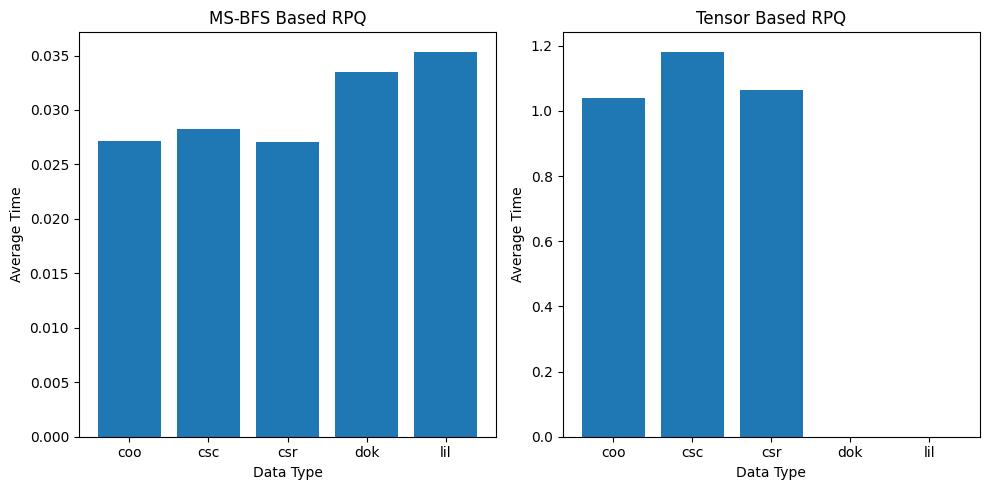

In [8]:
import matplotlib.pyplot as plt

average_times = df_1.groupby(['Algo', 'Data Type'])['Time'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, algo in enumerate(average_times['Algo'].unique()):
  algo_data = average_times[average_times['Algo'] == algo]

  grouped_data = algo_data.groupby('Data Type')['Time'].mean()

  axes[i].bar(grouped_data.index, grouped_data.values)

  axes[i].set_title(f'{algo}')
  axes[i].set_xlabel('Data Type')
  axes[i].set_ylabel('Average Time')

display(average_times)
plt.tight_layout()
plt.show()

,Algo,Start Nodes,Time
0,MS-BFS Based RPQ,10%,0.011363
1,MS-BFS Based RPQ,15%,0.011282
2,MS-BFS Based RPQ,20%,0.012164
3,MS-BFS Based RPQ,25%,0.013018
4,MS-BFS Based RPQ,30%,0.012410
5,MS-BFS Based RPQ,40%,0.013259
6,MS-BFS Based RPQ,5%,0.012049
7,MS-BFS Based RPQ,50%,0.014450
8,Tensor Based RPQ,10%,0.022155
9,Tensor Based RPQ,15%,0.024784


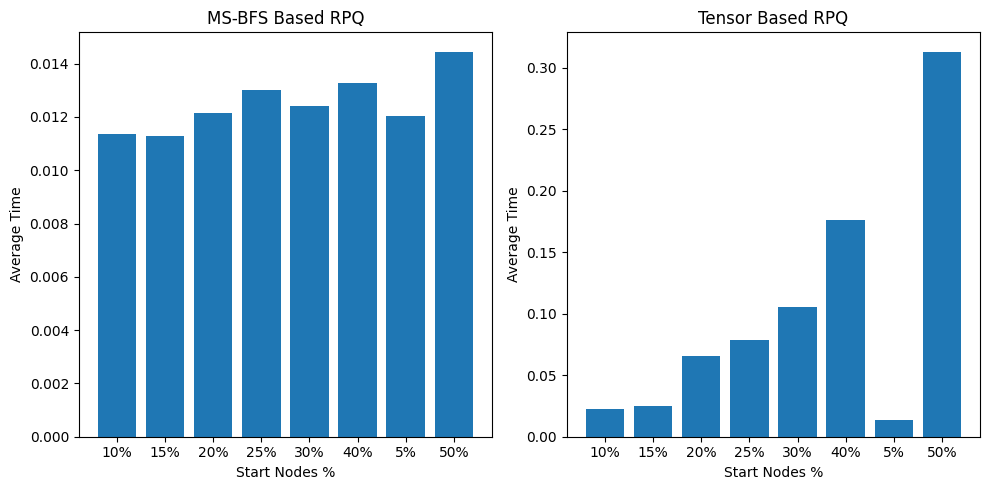

In [10]:
import matplotlib.pyplot as plt

average_times = df_2.groupby(['Algo', 'Start Nodes'])['Time'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, algo in enumerate(average_times['Algo'].unique()):
  algo_data = average_times[average_times['Algo'] == algo]

  grouped_data = algo_data.groupby('Start Nodes')['Time'].mean()

  axes[i].bar(grouped_data.index, grouped_data.values)

  axes[i].set_title(f'{algo}')
  axes[i].set_xlabel('Start Nodes %')
  axes[i].set_ylabel('Average Time')

display(average_times)
plt.tight_layout()
plt.show()